In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import math
import seaborn as sns

import statsmodels.api as sm
import plotly.tools as tls
import plotly.graph_objs as go
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np

# Descriptiva de datos elegidos y variables seleccionadas

El dataset elegido para el análisis es el de attrition_data.csv que contiene información sobre los empleados de muchas empresas de diferentes sectores. Los datos dan información del nivel de satisfacción de un empleado con la empresa en la que trabaja, así como el número de años que permanecen en la misma empresa los trabajadores. Están clasificados con datos socioeconómicos como por ejemplo edad, estado marital, estudios de los trabajadores o salario mensual. El dataset contiene 1470 filas y 13 columnas. Las columnas en las que nos vamos a centrar principalemnte son las siguientes:

* Age: Edad del empleado. Variable cuantitativa discreta, ya que solo puede tomar valores enteros.
  
* EducationField: Área de estudio del empleado. Variable categorica nominativa ya que no hay un orden entre las categorías.
  
El hecho de haber elegido estas dos variables se debe a la diferencia en su naturaleza (una variable cuantitativa y otra categórica) y al estudio previo realizado en el que se observó que al elegir estas dos variables se podían obtener diferentes casos de estudio de la normalidad de los datos.

A continuación, se enseña un resumen del dataframe elegido

In [2]:
df = pd.read_csv("attrition_data.csv")

df

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


Lo primero que estudiamos es la distribución de la variable categórica EducationalField. Se emplea un cross tab para ver la distribución de los empleados por área de estudio.

In [3]:
pd.crosstab(index=df['EducationField'], columns='count')

col_0,count
EducationField,
Human Resources,27
Life Sciences,606
Marketing,159
Medical,464
Other,82
Technical Degree,132


A partir de los datos anteriores, ahora se quiere dibujar un gráfico de tartas para ver la distribución de los empleados por área de estudio. 

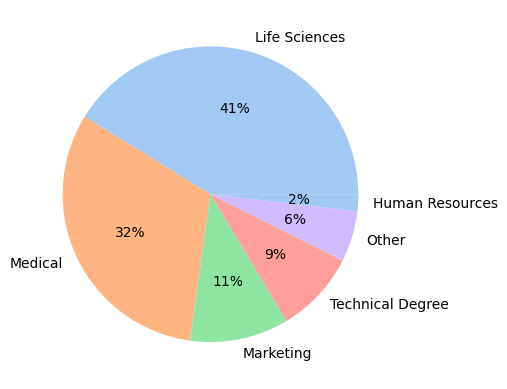

In [4]:
# Create data with the percentage of each EducationField
data = df['EducationField'].value_counts(normalize=True).sort_values(ascending=False)

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = data.index, colors = colors, autopct='%.0f%%')
plt.show()

Se puede observar como casi la mitad de los empleados son de la rama de Life Sciences, seguido de Medical y Marketing. Por otro lado, la rama de Human Resources es la que menos empleados tiene.

A continuación, se representa la tabla de frecuencia por intervalos de la variable Age para estudiar la distribución de la edad de los empleados.

In [5]:
# Select the age column and create class intervals
intervalos = pd.interval_range(start=17, end=65, freq=5)
edad_intervalos = pd.cut(df['Age'], bins=intervalos)

# Calculate absolute and relative frequency
frecuencia_absoluta = edad_intervalos.value_counts().sort_index()
frecuencia_relativa = frecuencia_absoluta / frecuencia_absoluta.sum()

# Calculate cumulative absolute frequency and cumulative relative frequency
frecuencia_absoluta_acumulada = frecuencia_absoluta.cumsum()
frecuencia_relativa_acumulada = frecuencia_relativa.cumsum()

# Calculate class mark
marca_clase = [(i.left + i.right) / 2 for i in frecuencia_absoluta.index]

# Create a DataFrame with the data
datos = pd.DataFrame({'Age': edad_intervalos.cat.categories, 'Class Mark': marca_clase, 'Abs. Freq.': frecuencia_absoluta, 'Cum. Abs. Freq.': frecuencia_absoluta_acumulada, 'Rel. Freq.': frecuencia_relativa, 'Cum. Rel. Freq.': frecuencia_relativa_acumulada})

# Print the frequency table
print(datos)

               Age  Class Mark  Abs. Freq.  Cum. Abs. Freq.  Rel. Freq.  \
(17, 22]  (17, 22]        19.5          57               57    0.038776   
(22, 27]  (22, 27]        24.5         153              210    0.104082   
(27, 32]  (27, 32]        29.5         306              516    0.208163   
(32, 37]  (32, 37]        34.5         332              848    0.225850   
(37, 42]  (37, 42]        39.5         243             1091    0.165306   
(42, 47]  (42, 47]        44.5         163             1254    0.110884   
(47, 52]  (47, 52]        49.5         110             1364    0.074830   
(52, 57]  (52, 57]        54.5          77             1441    0.052381   
(57, 62]  (57, 62]        59.5          29             1470    0.019728   

          Cum. Rel. Freq.  
(17, 22]         0.038776  
(22, 27]         0.142857  
(27, 32]         0.351020  
(32, 37]         0.576871  
(37, 42]         0.742177  
(42, 47]         0.853061  
(47, 52]         0.927891  
(52, 57]         0.980272

Se puede observar como más de un 40% de los empleados tienen entre 27 y 36 años. Por otro lado, la rango de edad con la frecuencia absoluta más alta es (32, 37] años.

Es importante resaltar también que la frecuencia relativa acumulada muestra que a partir de los 47 años, el número de empleados solo representa algo menos del 15% del total.

Para terminar esta sección se hace una tabla cruzada para ver la distribución de los empleados por área de estudio y por edad.

In [6]:
bins = pd.cut(df['Age'], bins=[17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67])

pd.crosstab(index=bins, columns=df['EducationField'],margins=True)


EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Age,,,,,,,
"(17, 22]",0,21,5,20,3,8,57
"(22, 27]",3,54,14,55,12,15,153
"(27, 32]",5,129,29,95,14,34,306
"(32, 37]",7,139,38,98,25,25,332
"(37, 42]",8,108,26,74,10,17,243
"(42, 47]",1,69,20,50,11,12,163
"(47, 52]",0,47,15,32,6,10,110
"(52, 57]",2,27,9,30,1,8,77
"(57, 62]",1,12,3,10,0,3,29


Se observa como, para la mayoría de los valores de EducationField excepto Human Resources y Technical Degrees, la frecuencia absoluta sigue una distribución muy similar a la observada para el conjunto total de los datos. Para Human Resources, la distribución de la edad es muy diferente a la de los demás campos de estudio, ya que solo se cuenta con una muestra de 27 empleados. En el caso de Techincal Degrees la discrepancia con respecto al resto de campos se puede deber a que, por lo general, los empleados de este campo de estudio son más jóvenes.

<br>

# Normalidad de la variable EducationField

## Histograma

De las submuestras de la variable EducationField, elegimos 3: Medical, Marketing y Other.

In [7]:
# Filter the dataframe by the values of column'EducationField' and store the result in three different dataframes

df_medical = df[df['EducationField'] == 'Medical']
df_marketing = df[df['EducationField'] == 'Marketing']
df_other = df[df['EducationField'] == 'Other']


A continuación representamos la función de densidad de probabilidad de las tres submuestras con un gráfico interactivo utilizando la librería plotly.

In [8]:
# create subplot for each EducationField
fig = make_subplots(rows=1, cols=3, subplot_titles=('Medical', 'Marketing', 'Other'))


# define a function to get the kernel density estimate

def get_kde(data):
    density_function = np.linspace(0, 80, 200)
    kernel = stats.gaussian_kde(data)
    density = kernel(density_function)
    return density_function, density

# add density plot for each EducationField
fig.add_trace(
    go.Scatter(x=get_kde(df_medical['Age'])[0], y=get_kde(df_medical['Age'])[1], mode='lines', name='Medical'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=get_kde(df_marketing['Age'])[0], y=get_kde(df_marketing['Age'])[1], mode='lines', name='Marketing'),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(x=get_kde(df_other['Age'])[0], y=get_kde(df_other['Age'])[1], mode='lines', name='Other'),
    row=1, col=3
)


# display the plot
fig.show()


En principio, la distribución de densidad de la variable age para las submuestras de Marketing y Other parece ser normal. En el caso de Medical, la distribución de densidad no parece ser normal, ya que tiene una cola a la derecha. No obstante, es necesario comprobar más estadísticos para ver si la distribución es normal o no.

## Boxplot

A continuación dibujamos el boxplot de la variable age para las 3 submuestras elegidas de la variable EducationField. Esto nos permite ver si hay outliers en las muestras, además de estudiar la simetría de las distribuciones.

Text(0.5, 1.0, 'Other')

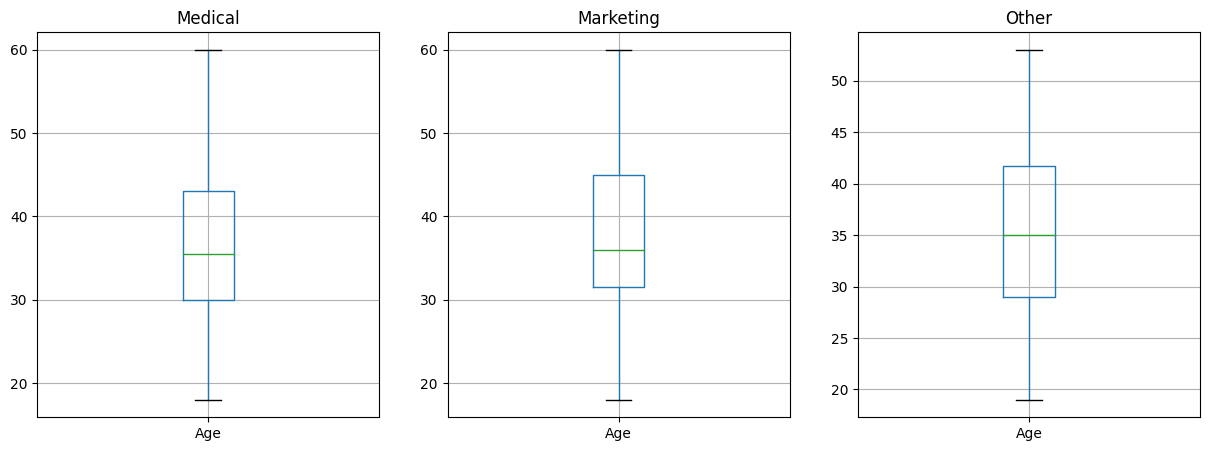

In [9]:
# Draw three subplots of type boxplot one per each value of 'MaritalStatus' and plot the column 'Age'

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
df_medical.boxplot(column='Age', ax=ax[0])
ax[0].set_title('Medical')
df_marketing.boxplot(column='Age', ax=ax[1])
ax[1].set_title('Marketing')
df_other.boxplot(column='Age', ax=ax[2])
ax[2].set_title('Other')



Los boxplot de las submuestras Marketing y Other si que parecen seguir una distribución normal, ya que los bigotes tienen longitud similar en ambos casos. Además, en el caso de Other, la mediana se encuentra en el centro del boxplot. Por otro lado, en el caso de Medical, la distribución no parece ser normal, ya que los bigotes tienen diferente longitud. En ninguno de los 3 casos se observan outliers.

## Describe

A continuación usamos el método describe para ver los estadísticos de las 3 submuestras elegidas de la variable EducationField. Esto nos permite estudiar las medidas de tendencia central y de dispersión de las muestras, lo que también ayuda a ver si las distribuciones son normales o no.

In [10]:
# Print the describe for each subdataframe and the median for each one by Age

print('Medical')

print(df_medical['Age'].describe())

print('Marketing')

print(df_marketing['Age'].describe())

print('Other')

print(df_other['Age'].describe())


Medical
count    464.000000
mean      36.838362
std        9.481012
min       18.000000
25%       30.000000
50%       35.500000
75%       43.000000
max       60.000000
Name: Age, dtype: float64
Marketing
count    159.000000
mean      37.924528
std        9.153783
min       18.000000
25%       31.500000
50%       36.000000
75%       45.000000
max       60.000000
Name: Age, dtype: float64
Other
count    82.000000
mean     35.365854
std       7.946600
min      19.000000
25%      29.000000
50%      35.000000
75%      41.750000
max      53.000000
Name: Age, dtype: float64


De los estadísticos anteriores, se puede observar como la media de la submuestra Marketing es mayor que la de las otras 2 submuestras. No obstante, y aunque la diferencia entre la media y la mediana es grande, la desviación típica de la submuestra Marketing es más pequeña que la de la muestra Medical. Esto es un indicativo de que la distribución puede ser normal.

Por otro lado, la desviación típica de la submuestra Medical es la mayor de todas,  y la diferencia entre la media y la mediana es la segunda mayor de las 3 submuestras. Esto es otro indicativo de que la distribución de la variable age para la submuestra Medical no es normal.

Sin embargo, en el caso de la submuestra Other, la diferencia entre la media y la mediana es muy pequeña. Además, la desviación típica es la menor de las 3 submuestras. Esto es otro indicativo de que la distribución de la variable age para la submuestra Other es probablemente normal.

## Q-Qplot

A continuación, se representan los QQplot de las 3 submuestras elegidas de la variable EducationField. Lo cual es otro nos permite ver si las distribuciones son normales o no. Para ello, hay que comparar los puntos de la muestra con los puntos de la recta de la distribución normal. Si los puntos siguen la recta, la distribución es normal. Si los puntos no siguen la recta, la distribución no es normal. Gracias a la librería Plotly, los 3 gráficos son interactivos.

In [11]:
# Draw three subplots of type qqplot one per each value of 'MaritalStatus' and plot the column 'Age'
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sm.qqplot(df_medical['Age'], line='s', ax=ax[0])
ax[0].set_title('Medical', fontsize=16)
sm.qqplot(df_marketing['Age'], line='s', ax=ax[1])
ax[1].set_title('Marketing', fontsize=16)
sm.qqplot(df_other['Age'], line='s', ax=ax[2])
ax[2].set_title('Other', fontsize=16)

# Convert the matplotlib figure to a Plotly figure
plotly_fig = tls.mpl_to_plotly(fig)

# Show the plot
plotly_fig.show()

En el caso de las submuestras Marketing y Other, los puntos siguen la recta de la distribución normal prácticamente para los valores teóricos de todos los quantiles, por lo que este es otro indicativo de que las distribuciones pueden ser normales. En el caso de Medical, los puntos no siguen la recta para valores entre -3 y -1.5 por lo que, probablemente, la distribución no es normal.

## Asimetría y Kurtosis

En esta sección, estudiamos la asimetría y la curtosis de las 3 submuestras elegidas de la variable EducationField. Si los valores de asimetría y curtosis de las muestras están cerca de 0, la distribución es normal. Si los valores de asimetría y curtosis de las muestras están lejos de 0, será otro indicador de que la distribución no es normal.

In [12]:
# Print the kurtosis and skewness for each subdataframe by Age

print('Medical')
print("Kurtosis", stats.kurtosis(df_medical["Age"]))
print("Skewness", stats.skew(df_medical["Age"]))
print('\n')

print('Marketing')
print("Kurtosis", stats.kurtosis(df_marketing["Age"]))
print("Skewness", stats.skew(df_marketing["Age"]))
print('\n')


print('Other')
print("Kurtosis", stats.kurtosis(df_other["Age"]))
print("Skewness", stats.skew(df_other["Age"]))


Medical
Kurtosis -0.5407140463019129
Skewness 0.4007435370754935


Marketing
Kurtosis -0.4573293692932481
Skewness 0.3117359148144718


Other
Kurtosis -0.6576266874771921
Skewness 0.1777279685911767


En las 3 submuestras, los valores de asimetría y kurtosis se encuentran en el rango de -1 a 1, lo que es un indicativo de que las distribuciones pueden ser normales. En el caso de Other, la asimetría es muy pequeña, lo que es un gran indicativo para esta submuestra de normalidad. 

En el caso de Marketing,la kurtosis es la más pequeña de las 3, y la asimetría la segunda más pequeña, lo que también hace que esta submuestra pueda tener una distribución normal.

Por último, el caso de Medical es el que tiene mayores valores de asimetría y kurtosis, lo que puede ser un indicativo de que esta distribución es la menos normal de las 3.

## Contraste de Hipótesis

Para terminar esta sección, se hace un contraste de hipótesis para ver si las distribuciones de las 3 submuestras elegidas de la variable EducationField son normales o no. Con el contraste de hipótesis se busca estudiar varios indicadores como el p-value y el estadístico de contraste. Si el p-value es menor que el nivel de significación, se rechaza la hipótesis nula, y por lo tanto, la distribución no es normal. Si el p-value es mayor que el nivel de significación, no se rechaza la hipótesis nula, y por lo tanto, la distribución es normal.

El primer test que se realiza es el de Kolmogorov-Smirnov o K2-test. Este test compara los datos observados con una función de distribución empírica acumulada.

In [13]:
# Normaltest for each subdataframe by Age

print('Medical')
k2, p_value = stats.normaltest(df_medical['Age'])
print(f"Estatístico de prueba: {k2}, p-value: {p_value}")
print('\n')

print('Marketing')
k2, p_value = stats.normaltest(df_marketing['Age'])
print(f"Estatístico de prueba: {k2}, p-value: {p_value}")
print('\n')

print('Other')
k2, p_value = stats.normaltest(df_other['Age'])
print(f"Estatístico de prueba: {k2}, p-value: {p_value}")

Medical
Estatístico de prueba: 21.951375222468364, p-value: 1.7112735403146025e-05


Marketing
Estatístico de prueba: 4.387268654244352, p-value: 0.11151074476469593


Other
Estatístico de prueba: 2.729178899877779, p-value: 0.2554855440655358


Los resultados del K2-test para las submuestras de Marketing y Other arrojan un p-value superior al nivel de significación de 0.05, por lo que no se rechaza la hipótesis nula, y por lo tanto, las distribuciones de las submuestras de Marketing y Other son normales de acuerdo con este indicador. En el caso de Medical, el p-value es muy pequeño y cercano a 0, por lo que esta distribución no es normal de acuerdo con este indicador.

No obstante, es recomendable realizar otro contraste de hipótesis con otro tipo de test, ya que el test de Kolmogorov-Smirnov es útil con grandes muestras, y puede dar resultados erróneos para muestras pequeñas.

En este caso se elige el Saphiro-test, que es un test de contraste de hipótesis para muestras pequeñas.

In [14]:
# Shapiro test for each subdataframe by Age

print('Medical')
shapiro_test, p_value = stats.shapiro(df_medical["Age"])
print(f"Estatístico de prueba: {shapiro_test}, p-value: {p_value}")
print('\n')

print('Marketing')
shapiro_test, p_value = stats.shapiro(df_marketing["Age"])
print(f"Estatístico de prueba: {shapiro_test}, p-value: {p_value}")
print('\n')

print('Other')
shapiro_test, p_value = stats.shapiro(df_other["Age"])
print(f"Estatístico de prueba: {shapiro_test}, p-value: {p_value}")

Medical
Estatístico de prueba: 0.9738271832466125, p-value: 2.2070088334658067e-07


Marketing
Estatístico de prueba: 0.9805779457092285, p-value: 0.024550719186663628


Other
Estatístico de prueba: 0.9810986518859863, p-value: 0.2690286934375763


Según el test de Shapiro, solo la submuestra Other sigue una distribución normal, ya que es la única que cumple que el p-value = 0.269 es mayor que nuestro nivel de significación 0.05.

En el caso de la submuestra Marketing, el p-value = 0.02455, que es menor que nuestro nivel de significación 0.05, por lo que se rechaza la hipótesis nula, y por lo tanto, la distribución no es normal.

Lo mismo ocurre con la submuestra Medical, que es la que presenta un p-value más pequeño (y muy cercano a 0), concluyendo que la distribución no es normal.

Podemos concluir entonces que la distribución de la submuestra Other es la única de la que se puede estar más seguro que sigue una distribución normal. 

En el caso de Medical, se puede concluir que la distribución probablemente no es normal ya que muchos de los indicadores estudiados así nos lo muestran.

En el caso de Marketing es donde más dudas existen, ya que gran parte de los indicadores nos muestran que sigue una distribución normal, pero el test de Saphiro nos dice lo contrario. Por lo tanto, en este caso, no se puede estar seguro de que la distribución sea normal.

<br>

# Estimación puntual y por intervalos

## Estimacion puntual de la edad media de la población comparada con la edad media de cada una de las muestras

In [15]:
print('Edad Media Total')
df['Age'].mean()

Edad Media Total


36.923809523809524

In [16]:
print('Edad Media Medical')
print(df_medical['Age'].mean())
print('\n')

print('Edad Media Marketing')
print(df_marketing['Age'].mean())
print('\n')

print('Edad Media Other')
print(df_other['Age'].mean())

Edad Media Medical
36.838362068965516


Edad Media Marketing
37.924528301886795


Edad Media Other
35.36585365853659


In [17]:
print('Diferencia Edad Media Medical:')
print(df['Age'].mean()-df_medical['Age'].mean())
print('\n')
print('Diferencia Edad Media Marketing:')
print(df['Age'].mean()-df_marketing['Age'].mean())
print('\n')
print('Diferencia Edad Media Other:')
print(df['Age'].mean()-df_other['Age'].mean())

Diferencia Edad Media Medical:
0.08544745484400806


Diferencia Edad Media Marketing:
-1.000718778077271


Diferencia Edad Media Other:
1.5579558652729375


## Intervalos de confianza

In [18]:
z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)

df_medical_ages_count=df_medical['Age'].count()
#print(df_medical_ages_count)

pop_stdev = df_medical['Age'].std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(df_medical_ages_count))

confidence_interval_medical = (df_medical['Age'].mean() - margin_of_error,
                       df_medical['Age'].mean() + margin_of_error)  

print("Confidence interval Medical:")
print(confidence_interval_medical)

z-critical value:
1.959963984540054
Confidence interval Medical:
(35.97569387774284, 37.70103026018819)


El valor crítico de z es 1.959963984540054, lo que significa que usamos un nivel de confianza del 95%. El intervalo de confianza para la variable Medical es (35.97569387774284, 37.70103026018819), lo que significa que hay un 95% de probabilidad de que la media de edad de Medical esté entre esos dos valores.

In [19]:
z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)

df_marketing_ages_count=df_marketing['Age'].count()
#print(df_medical_ages_count)

pop_stdev = df_marketing['Age'].std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(df_marketing_ages_count))

confidence_interval_marketing = (df_marketing['Age'].mean() - margin_of_error,
                       df_marketing['Age'].mean() + margin_of_error)  

print("Confidence interval Marketing:")
print(confidence_interval_marketing)

z-critical value:
1.959963984540054
Confidence interval Marketing:
(36.50170776927914, 39.34734883449445)


El valor crítico de z es 1.959963984540054, lo que significa que usamos un nivel de confianza del 95%. El intervalo de confianza para la variable Marketing es (36.50170776927914, 39.34734883449445), lo que significa que hay un 95% de probabilidad de que la media de edad de Marketing esté entre esos dos valores.

In [20]:
z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)

df_other_ages_count=df_marketing['Age'].count()
#print(df_medical_ages_count)

pop_stdev = df_other['Age'].std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(df_other_ages_count))

confidence_interval_other = (df_other['Age'].mean() - margin_of_error,
                       df_other['Age'].mean() + margin_of_error)  

print("Confidence interval Other:")
print(confidence_interval_other)

z-critical value:
1.959963984540054
Confidence interval Other:
(34.13067188689145, 36.601035430181724)


El valor crítico de z es 1.959963984540054, lo que significa que usamos un nivel de confianza del 95%. El intervalo de confianza para la variable Other es (34.13067188689145, 36.601035430181724), lo que significa que hay un 95% de probabilidad de que la media de edad de Other esté entre esos dos valores.

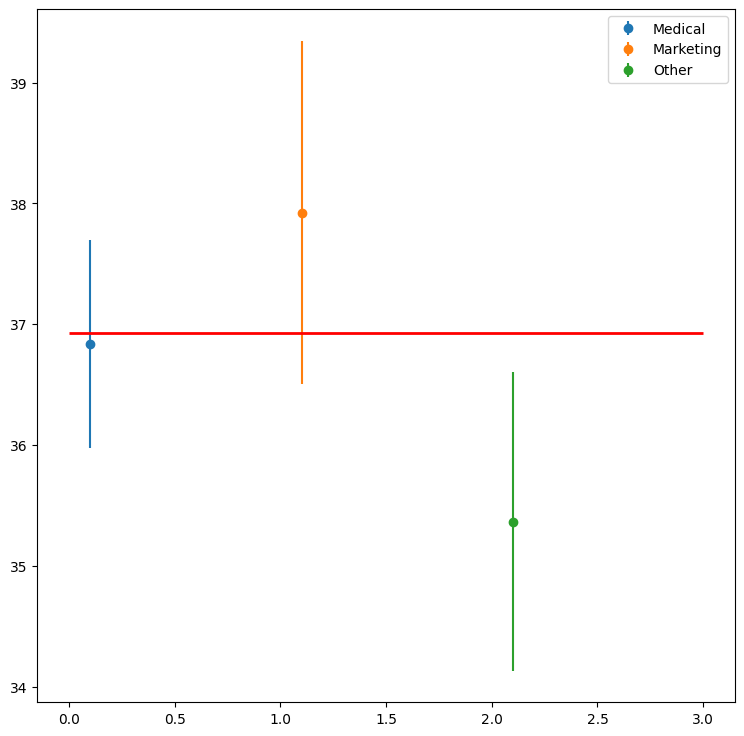

In [21]:
sample_means = [df_medical['Age'].mean(),df_marketing['Age'].mean(),df_other['Age'].mean()]
intervals = [confidence_interval_medical,confidence_interval_marketing, confidence_interval_other]
plt.figure(figsize=(9,9))

labels = ["Medical", "Marketing", "Other"] # una lista con los nombres de cada punto
for i in range(len(sample_means)):
    plt.errorbar(x=np.arange(0.1, 3, 1)[i], 
                 y=sample_means[i], 
                 yerr=[abs(top-bot)/2 for top,bot in intervals][i],
                 fmt='o',
                 label=labels[i])
plt.legend()

plt.hlines(xmin=0, xmax=3 ,
           y=df['Age'].mean(), 
           linewidth=2.0,
           color="red");

La edad media de conjutno de datos es 36.923809523809524.

Al analizar los datos de Medical, Marketing y Other, se observaron diferencias significativas en la edad media entre los grupos. Los intervalos de confianza para la edad media en cada submuestra fueron: Medical: 35.97-37.70 años, Marketing: 36.50-39.34 años y Other: 34.13-36.60 años. El grupo Other fue el único que no incluyó la edad media de la muestra total en su intervalo de confianza, lo que indica que su edad media era diferente a la de los otros grupos.

# T Test

En esta sección, vamos a realizar un T-test de una muestra para comparar la edad media de los empleados de los distintos campos (df_medical, df_marketing, df_other) con la edad media de todos los empleados del conjunto de datos (df). Para ello, la hipótesis nula será que la edad media de los empleados de cada campo es igual a la edad media de todos los empleados del conjunto de datos, y la hipótesis alternativa es que la edad media de los empleados de cada campo es diferente de la edad media de todos los empleados del conjunto de datos.

In [22]:
print('La media de la muestra es: {}'.format(df['Age'].mean()))
print('La media de la submuestra Medical es: {}'.format(df_medical['Age'].mean()))
print('La media de la submuestra Marketing es: {}'.format(df_marketing['Age'].mean()))
print('La media de la submuestra Other es: {}'.format(df_other['Age'].mean()))

La media de la muestra es: 36.923809523809524
La media de la submuestra Medical es: 36.838362068965516
La media de la submuestra Marketing es: 37.924528301886795
La media de la submuestra Other es: 35.36585365853659


Primero, empezamos con la submuestra Medical.

### T test Medical:

In [23]:
stats.ttest_1samp(a = df_medical['Age'],               # Sample data
                 popmean = df['Age'].mean())  # Pop mean

TtestResult(statistic=-0.19413482004883564, pvalue=0.8461554638871963, df=463)

Respecto al T-Test Medical, el valor estadístico nos indica que la edad media de los empleados en el sector de la medicina es ligeramente inferior a la edad media general de todos los empleados de la empresa y el p valor (al ser mayor que 0,05) que no existe una diferencia estadísticamente significativa entre la edad de los empleados del sector de la medicina y la de la población general. 

### T test Marketing:

In [24]:
stats.ttest_1samp(a = df_marketing['Age'],               # Sample data
                 popmean = df['Age'].mean())  # Pop mean

TtestResult(statistic=1.3785103031158195, pvalue=0.1699945153513996, df=158)

Respecto al T-Test Marketing, el valor estadístico nos indica que la edad media de los empleados en el sector de marketing es ligeramente superior a la edad media general de todos los empleados de la empresa y el p valor (al ser mayor que 0,05) que no existe una diferencia estadísticamente significativa entre la edad de los empleados del sector de marketing y la de la población general. 

### T test Other:

In [25]:
stats.ttest_1samp(a = df_other['Age'],               # Sample data
                 popmean = df['Age'].mean())  # Pop mean

TtestResult(statistic=-1.7753367031098277, pvalue=0.0795986010116815, df=81)

Respecto al T-Test Other, el valor estadístico nos indica que la edad media de los empleados en el sector de marketing es significamente inferior a la edad media general de todos los empleados de la empresa y el p valor (al ser mayor que 0,05) que no existe una diferencia estadísticamente significativa entre la edad de los empleados del sector de marketing y la de la población general. 

Al estar el p-valor de las 3 submuestras por encima de 0,05 no podemos rechazar la hipótesis nula $H_0: \mu_{poblacion}=\mu_{muestra}$

# Análisis de la varianza (ANOVA)


El análisis de varianza (ANOVA) es un método estadístico que permite descubrir si las medias de tres o más grupos son diferentes. En este caso, se quiere saber si hay diferencias significativas entre las medias de los grupos Medical, Marketing y Other.

In [26]:
# Group age data by EducationField
#groups = df.groupby("EducationField").groups
#print(groups)

# Extract individual groups
medical = df.loc[df.EducationField == "Medical", "Age"]
marketing = df.loc[df.EducationField == "Marketing", "Age"]
other = df.loc[df.EducationField == "Other", "Age"]

# Perform the ANOVA
stats.f_oneway(medical, marketing, other)



F_onewayResult(statistic=2.1160294096028, pvalue=0.12127718000609333)

El resultado de la prueba muestra un valor de F = 2.116 y un valor p = 0.121.
Como el valor p es mayor que 0.05, no se puede rechazar la hipótesis nula de que las medias de los tres grupos son iguales, esto significa que no hay evidencia suficiente para afirmar que los grupos: Medical, Marketing y Other tienen diferencias significativas entre las medias de edad de cada grupo.

In [27]:
print("Marketing & Medical")
print(stats.ttest_ind(marketing, medical))
print("Marketing & Other")
print(stats.ttest_ind(marketing, other))
print("Medical & Other")
print(stats.ttest_ind(medical, other))

Marketing & Medical
Ttest_indResult(statistic=1.2575803828536882, pvalue=0.20901625716129082)
Marketing & Other
Ttest_indResult(statistic=2.147554600783695, pvalue=0.03275527489993353)
Medical & Other
Ttest_indResult(statistic=1.3262054531065688, pvalue=0.18532817992936473)


Los valores p para cada prueba t por pares sugieren que la media de edad de "Marketing" y "Other" es probablemente diferente, ya que el valor p para la prueba t de dichos grupos es inferior a 0,05, en concreto:

Marketing & Medical: No se rechaza la hipótesis nula porque el valor p (0.209) es mayor que el nivel de significancia (0.05). Esto significa que no hay evidencia suficiente para afirmar que las medias son diferentes.

Marketing & Other: Se rechaza la hipótesis nula porque el valor p (0.033) es menor que el nivel de significancia (0.05). Esto significa que hay evidencia suficiente para afirmar que las medias son diferentes.

Medical & Other: No se rechaza la hipótesis nula porque el valor p (0.185) es mayor que el nivel de significancia (0.05). Esto significa que no hay evidencia suficiente para afirmar que las medias son diferentes.

group1,group2,meandiff,p-adj,lower,upper,reject
Human Resources,Life Sciences,0.0702,1.0,-5.056,5.1964,False
Human Resources,Marketing,0.8875,0.9972,-4.5374,6.3124,False
Human Resources,Medical,-0.1987,1.0,-5.3582,4.9609,False
Human Resources,Other,-1.6712,0.963,-7.454,4.1116,False
Human Resources,Technical Degree,-0.9158,0.997,-6.4206,4.589,False
Life Sciences,Marketing,0.8173,0.9166,-1.505,3.1395,False
Life Sciences,Medical,-0.2689,0.9969,-1.8766,1.3388,False
Life Sciences,Other,-1.7414,0.5851,-4.8081,1.3252,False
Life Sciences,Technical Degree,-0.986,0.8715,-3.4894,1.5173,False
Marketing,Medical,-1.0862,0.7884,-3.4811,1.3088,False


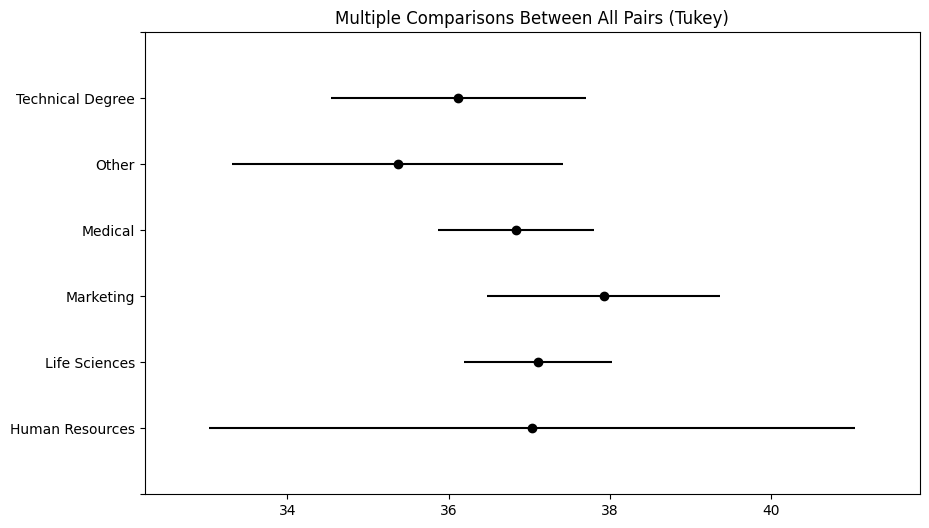

In [28]:
import statsmodels.stats.multicomp as multi

tukey = multi.pairwise_tukeyhsd(df['Age'], df['EducationField'])
#print(tukey)

tukey.plot_simultaneous()    # Plot group confidence intervals

tukey.summary()              # See test summary


El resultado de la prueba de Tukey muestra la diferencia promedio, un intervalo de confianza y si debe aceptar la hipótesis nula para cada par de grupos en el nivel de significación dado. En este caso, la prueba sugiere que aceptemos la hipótesis nula para todos los pares. La gráfica del intervalo de confianza del 95 % refuerza los resultados visualmente: todos los intervalos de confianza se superponen.